# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [203]:
tsa=pd.read_csv('tsa_claims_ujian.csv')
tsaO=tsa.copy()

In [204]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [205]:
tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [206]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [207]:
tsa.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [208]:
tsaDesc = []
for i in tsa.columns:
    tsaDesc.append([i, 
                      tsa[i].dtypes, 
                      tsa[i].isna().sum(), 
                      round((((tsa[i].isna().sum())/(len(tsa)))*100),2), 
                      tsa[i].nunique(),
                      tsa[i].drop_duplicates().sample(2).values])
    
pd.DataFrame(tsaDesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2011090986816, 2008112652811]"
1,Date Received,object,70,0.14,3522,"[19-Dec-05, 27-May-08]"
2,Incident Date,object,570,1.12,10788,"[4/15/2006 0:00, 7/7/2013 18:30]"
3,Airport Code,object,2052,4.02,405,"[PDT, SAN]"
4,Airport Name,object,2052,4.02,419,"[Juneau International, Bethel Airport]"
5,Airline Name,object,8555,16.75,243,"[Korean Airlines , Independence Air]"
6,Claim Type,object,1960,3.84,8,"[Personal Injury, Passenger Theft]"
7,Claim Site,object,190,0.37,6,"[nan, Motor Vehicle]"
8,Item,object,1012,1.98,1854,[Decorations - Christmas; Birthday; etc.; Medi...
9,Claim Amount,object,992,1.94,13248,"[$43.64 , $614.98 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [209]:
def filterstrip(cols):
    if cols == '-':
        return np.nan
    else:
        return cols
    

In [210]:
# tsa['Airport Code'].apply(filterstrip)
for i in tsa.columns:
    tsa[i] = tsa[i].apply(filterstrip)

In [211]:
tsa

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,22-Oct-15,19-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN


Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [212]:
index_error = []
for idx,val in enumerate(tsa['Incident Date']):
    try:
        pd.to_datetime(val)
    except:
        index_error.append(idx)

In [213]:
np.array(index_error)

array([13729, 14323, 14856, 14976, 14995, 15278, 15934, 16813, 17198,
       19151, 21528, 22161, 23232, 24355, 24525, 24768, 24903, 25249,
       25705, 25734, 26129, 26530, 27086, 27481, 27628, 27819, 27901,
       28031, 28037, 29065, 29652, 31140, 31570, 31590, 31771, 33613])

In [214]:
tsa.iloc[index_error]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,24-Jan-05,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,23-Feb-05,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,23-Mar-05,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,29-Mar-05,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,30-Mar-05,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,12-Apr-05,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,17-May-05,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,8-Jul-05,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,1-Aug-05,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,8-Dec-05,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


In [215]:
tsa['Date Received'] = pd.to_datetime(tsa['Date Received'])

For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [216]:
month = {'Jan':'1', 'Feb':'2', 'Mar':'3', 'Apr':'4', 'May':'5', 'Jun':'6', 'Jul':'7', 'Aug':'8', 'Sep':'9', 'Oct':'10', 'Nov':'11', 'Dec':'12'}
for i in index_error:
    x = str(tsa['Incident Date'][i])
    y = str(tsa['Date Received'][i].year)
    for j,k in month.items():
        if x[3:6] == j.upper():
            a = str(y+'/'+month[j]+'/'+x[:2])
            tsa.at[i,'Incident Date']=a
tsa['Incident Date']=pd.to_datetime(tsa['Incident Date'])

In [217]:
tsa

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,2015-10-22,2015-10-19,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN
51062,2015110226479,2015-11-02,2015-11-02,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN
51063,2015120727336,2015-11-16,2015-09-14,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN
51064,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN


Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [218]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [219]:
tsa.iloc[index_error]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences when the claim made with the incident that happen.

In [220]:
day = []
for i in range(len(tsa)):
    day.append((tsa['Date Received'][i]- tsa['Incident Date'][i]).days)

In [221]:
tsa['Day Differences'] = day

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

Text(0.5, 1.0, 'Day Differences Distribution')

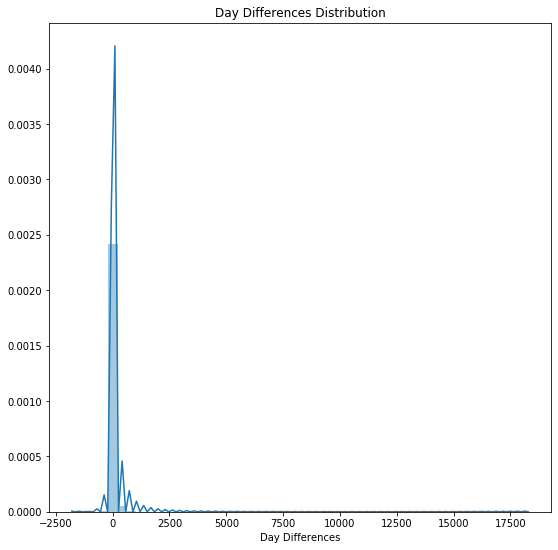

In [222]:
plt.figure(figsize = (9,9))
sns.distplot(tsa['Day Differences'].dropna())
plt.title('Day Differences Distribution')

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

Text(0.5, 1.0, 'Day Differences Distribution less than 0')

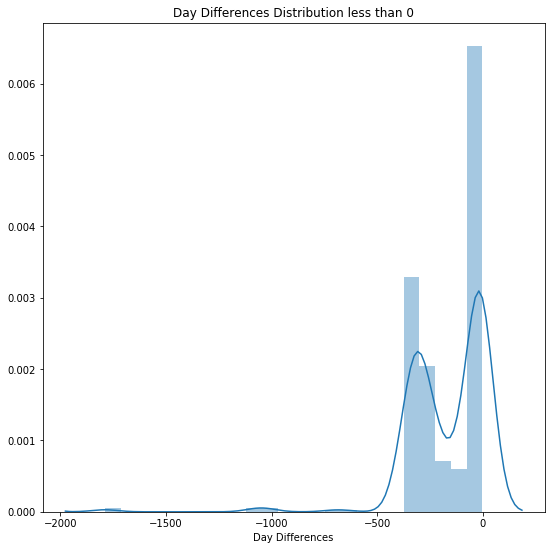

In [223]:
plt.figure(figsize = (9,9))
sns.distplot(tsa[tsa['Day Differences'] < 0]['Day Differences'].dropna())
plt.title('Day Differences Distribution less than 0')

Text(0.5, 1.0, 'Day Differences Distribution over than 1000')

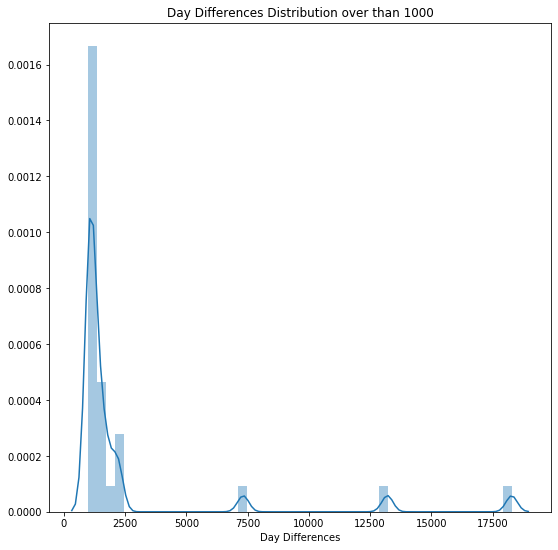

In [224]:
plt.figure(figsize = (9,9))
sns.distplot(tsa[tsa['Day Differences'] > 1000]['Day Differences'].dropna())
plt.title('Day Differences Distribution over than 1000')

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

In [225]:
more_1000 = tsa3[tsa3['Day Differences'] > 1000]
less_0 = tsa3[tsa3['Day Differences'] < 0]

In [226]:
more_1000['Date Received Day'] = more_1000['Date Received'].apply(lambda x: x.day)
more_1000['Incident Day'] = more_1000['Incident Date'].apply(lambda x: x.day)
more_1000['Date Received Month'] = more_1000['Date Received'].apply(lambda x: x.month)
more_1000['Incident Month'] = more_1000['Incident Date'].apply(lambda x: x.month)
more_1000['Date Received Year'] = more_1000['Date Received'].apply(lambda x: x.year)
more_1000['Incident Year'] = more_1000['Incident Date'].apply(lambda x: x.year)
more_1000.groupby(['Date Received Year','Incident Year']).mean()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Day Differences  Date Received Day  \
Date Received Year Incident Year                                       
2003               2000               1446.000000          17.000000   
2004               2000               1525.000000           5.000000   
                   2001               1125.333333          13.333333   
2005               2000               1833.000000          10.000000   
                   2002               1128.000000           1.000000   
2006               2000               2201.000000           2.000000   
                   2003               1078.666667          22.000000   
2007               2000               2217.000000          24.000000   
                   2003               1607.000000          19.000000   
                   2004               1091.000000          17.600000   
2008               2002               2136.000000          31.000000   
                   2004               1471.000000          14.000000   
                   2005               1093.500000          11.250000   
2009               2005               1696.000000           1.000000   
2015               2012               1083.500000          21.000000   
2025               2005               7318.000000           2.000000   
2040               2003              13203.000000          12.000000   
2055               2005              18279.000000          17.000000   

                                  Incident Day  Date Received Month  \
Date Received Year Incident Year                                      
2003               2000                    1.0            12.000000   
2004               2000                    1.0             3.000000   
                   2001                    4.0             6.000000   
2005               2000                    3.0            11.000000   
                   2002                   30.0             6.000000   
2006               2000                   23.0            11.000000   
                   2003                    9.0             4.333333   
2007               2000                   29.0             1.000000   
                   2003                   26.0            12.000000   
                   2004                   15.6             7.200000   
2008               2002                   25.0            10.000000   
                   2004                    4.0             1.000000   
                   2005                   13.5             5.250000   
2009               2005                   10.0            12.000000   
2015               2012                   17.0             8.500000   
2025               2005                   20.0             8.000000   
2040               2003                   20.0             2.000000   
2055               2005                   30.0             5.000000   

                                  Incident Month  
Date Received Year Incident Year                  
2003               2000                 1.000000  
2004               2000                 1.000000  
                   2001                 5.333333  
2005               2000                11.000000  
                   2002                 4.000000  
2006               2000                10.000000  
                   2003                 5.333333  
2007               2000                12.000000  
                   2003                 7.000000  
                   2004                 7.400000  
2008               2002                12.000000  
                   2004                 1.000000  
                   2005                 5.250000  
2009               2005                 4.000000  
2015               2012                 9.000000  
2025               2005                 7.000000  
2040               2003                12.000000  
2055               2005                 4.000000

In [227]:
less_0['Date Received Day'] = less_0['Date Received'].apply(lambda x: x.day)
less_0['Incident Day'] = less_0['Incident Date'].apply(lambda x: x.day)
less_0['Date Received Month'] = less_0['Date Received'].apply(lambda x: x.month)
less_0['Incident Month'] = less_0['Incident Date'].apply(lambda x: x.month)
less_0['Date Received Year'] = less_0['Date Received'].apply(lambda x: x.year)
less_0['Incident Year'] = less_0['Incident Date'].apply(lambda x: x.year)
less_0.groupby(['Date Received Year','Incident Year']).mean()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Day Differences  Date Received Day  \
Date Received Year Incident Year                                       
2000               2005              -1789.000000           8.000000   
2002               2003               -240.333333          13.333333   
2003               2003               -132.208333          16.000000   
                   2004               -337.666667          13.833333   
2004               2004               -116.268293          12.951220   
                   2005               -323.750000          17.250000   
                   2006               -665.000000          28.000000   
                   2007              -1047.000000          11.500000   
                   2008              -1788.000000           5.000000   
2005               2005               -198.246154          12.184615   
                   2006               -346.111111          16.444444   
                   2008              -1065.000000           5.000000   
2006               2006               -158.000000          15.906250   
                   2007               -352.000000          20.000000   
                   2008               -869.500000          22.000000   
2007               2007               -135.888889          11.666667   
                   2008               -348.250000          18.250000   
2008               2008               -245.891892          17.513514   
                   2009               -311.333333          13.666667   
2009               2009                -52.000000          16.166667   
                   2010               -127.666667          21.000000   
2010               2010                -41.115385          14.615385   
2011               2011                -29.470588          15.176471   
2012               2012                 -1.000000          11.400000   
2013               2013                 -1.000000          20.400000   

                                  Incident Day  Date Received Month  \
Date Received Year Incident Year                                      
2000               2005               2.000000             9.000000   
2002               2003              10.333333             7.666667   
2003               2003              16.541667             4.250000   
                   2004              15.666667             6.500000   
2004               2004              17.260163             5.138211   
                   2005              14.375000             5.750000   
                   2006              24.000000             8.000000   
                   2007              24.500000             8.000000   
                   2008              28.000000             2.000000   
2005               2005              17.384615             2.984615   
                   2006              11.111111             3.222222   
                   2008               5.000000             8.000000   
2006               2006              17.187500             4.937500   
                   2007              14.750000             7.750000   
                   2008              23.500000             2.500000   
2007               2007              18.333333             4.666667   
                   2008              16.500000             3.500000   
2008               2008              19.756757             2.405405   
                   2009               9.666667             5.666667   
2009               2009              19.333333             6.433333   
                   2010              16.666667            10.333333   
2010               2010              17.000000             7.461538   
2011               2011              17.176471             5.117647   
2012               2012              11.400000             6.600000   
2013               2013              20.400000             3.600000   

                                  Incident Month  
Date Received Year Incident Year                  
2000               2005                 8.000000  
2002              

In [228]:
# less_0['Date Received Month'] = less_0['Date Received'].apply(lambda x: x.month)
# less_0['Incident Month'] = less_0['Incident Date'].apply(lambda x: x.month)
# less_0.groupby(['Date Received Month','Incident Month']).mean()

In [229]:
# less_0['Date Received Day'] = less_0['Date Received'].apply(lambda x: x.day)
# less_0['Incident Day'] = less_0['Incident Date'].apply(lambda x: x.day)
# less_0.groupby(['Date Received Day','Incident Day']).mean().sort_values(by='Date Received Year',ascending = False)

Berdasarkan tabel diatas kemungkinan terjadi antara data Day Differences yang memiliki nilai lebih dari 1000 dan kurang dari 0 adalah sebagai berikut:

Day Differences lebih dari 1000 dari tabel yang telah di groupby dari date reicieved year dan incident year terlihat bahwa di tahun date reicieved year nya 2055 dan incident year nya 2005 memiliki perbedaan 50 tahun yang mana biasanya kita melaporkan barang harus segera ketika incident itu terjadi. Kemungkinan yang terjadi disini adalah kesalahan input tahun 2005 dengan 2055

Day Differences kurang dari 0 memperlihatkan seolah olah kita tahu masa depan minimal 1 tahun. Kemungkinan yang terjadi disini adalah salah input saja.


Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [231]:
import re
tsa['Claim Amount'] = tsa['Claim Amount'].apply(lambda x: float(re.sub('[;]','',re.sub('[$]', '', x))) if not pd.isna(x) else x)
tsa['Close Amount'] = tsa['Close Amount'].apply(lambda x: float(re.sub('[;]','',re.sub('[$]', '', x))) if not pd.isna(x) else x)

In [232]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 14 columns):
Claim Number       51066 non-null object
Date Received      50996 non-null datetime64[ns]
Incident Date      50496 non-null datetime64[ns]
Airport Code       48915 non-null object
Airport Name       48915 non-null object
Airline Name       41470 non-null object
Claim Type         49035 non-null object
Claim Site         50817 non-null object
Item               48918 non-null object
Claim Amount       46886 non-null float64
Status             47877 non-null object
Close Amount       33786 non-null float64
Disposition        32846 non-null object
Day Differences    50460 non-null float64
dtypes: datetime64[ns](2), float64(3), object(9)
memory usage: 5.5+ MB


Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [233]:
# amount = []
# for i in range(len(tsa['Claim Amount'])):
#     amount.append(tsa['Claim Amount'][i]-tsa['Close Amount'][i])

In [234]:
# amount

In [235]:
tsa['Amount Differences'] = tsa[['Claim Amount', 'Close Amount']].apply(lambda x: x['Claim Amount'] - x['Close Amount'], axis = 1)

In [236]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null float64
Status                47877 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Day Differences       50460 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.8+ MB


In [237]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

Text(0.5, 1.0, 'Amount Differences Distribution')

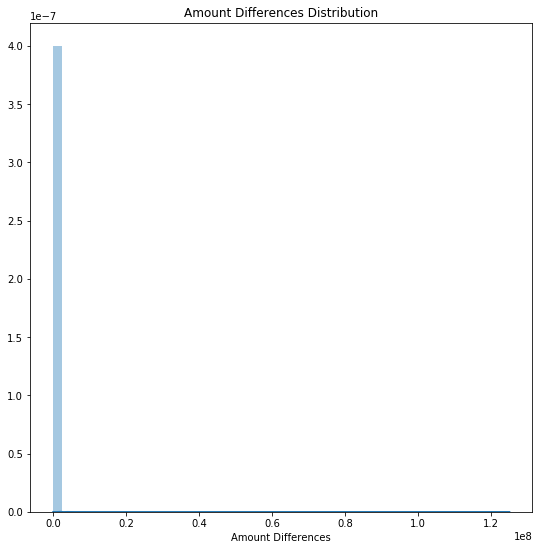

In [238]:
plt.figure(figsize = (9,9))
sns.distplot(tsa['Amount Differences'].dropna())
plt.title('Amount Differences Distribution')

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [239]:
Q1_amount = tsa['Amount Differences'].describe()['25%']
Q3_amount = tsa['Amount Differences'].describe()['75%']
IQR_amount = Q3_amount - Q1_amount

In [242]:
no_outlier_amount = tsa[(tsa['Amount Differences'] >= Q1_amount - (1.5*IQR_amount)) & (tsa['Amount Differences'] <= Q3_amount + (1.5 * IQR_amount))]['Amount Differences'].index

In [243]:
outlier_amount = tsa[(tsa['Amount Differences'] < Q1_amount - (1.5*IQR_amount)) | (tsa['Amount Differences'] > Q3_amount + (1.5 * IQR_amount))]['Amount Differences'].index

In [244]:
tsa.loc[outlier_amount]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,2009-12-29,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.00,Deny,11.0,2200.00
36210,2009123167017,2009-12-29,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.00,Deny,26.0,900.00
36213,2010010867323,2009-12-29,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.00,Deny,7.0,1240.00
36225,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.00,Deny,15.0,2300.00


In [245]:
tsa['Claim Amount'].loc[outlier_amount].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [246]:
tsa['Close Amount'].loc[outlier_amount].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

In [251]:
#Done the Normality Test
from scipy.stats import shapiro, normaltest, anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro': shapiro(data)[1], 
     'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [257]:
no_outlier_claim = tsa['Claim Amount'].loc[outlier_amount]
no_outlier_close = tsa['Close Amount'].loc[outlier_amount]
outlier_claim = tsa['Claim Amount'].loc[outlier_amount]
outlier_close = tsa['Close Amount'].loc[outlier_amount]

In [258]:
for i in ['Total_Words']:
    for key,val in {'no_outlier_claim' : tsa['Claim Amount'].loc[outlier_amount], 
                    'no_outlier_close': tsa['Close Amount'].loc[outlier_amount], 
                    'outlier_claim': tsa['Claim Amount'].loc[outlier_amount], 
                    'outlier_close': tsa['Close Amount'].loc[outlier_amount]}.items():
        print(key+' ')
        print(try_normal(val))
        print('\n')

no_outlier_claim 
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'stat': 1559.8322253694841}, 'Shapiro': 0.0, 'K^2': 0.0}


no_outlier_close 
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'stat': 1244.9229604344491}, 'Shapiro': 0.0, 'K^2': 0.0}


outlier_claim 
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'stat': 1559.8322253694841}, 'Shapiro': 0.0, 'K^2': 0.0}


outlier_close 
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'stat': 1244.9229604344491}, 'Shapiro': 0.0, 'K^2': 0.0}




In [259]:
from scipy.stats import mannwhitneyu
mannwhitneyu(no_outlier_claim, no_outlier_close)

MannwhitneyuResult(statistic=261430.5, pvalue=0.0)

In [260]:
mannwhitneyu(outlier_claim, outlier_close)

MannwhitneyuResult(statistic=261430.5, pvalue=0.0)

Dari data yang ada pertama yang dilakukan adalah Normal tes untuk menguji data tersebut terdistribusi normal atau tidak. Hasil dari normal tes memperlihatkan bahwa data claim amount dan close amount yang memiliki outlier atau tidak, terdistribusi tidak normal, maka dari itu saya akan melakukan test mannwhitneyu untuk memperlihatkan hubungan keduanya.

Test mannwhitneyu dari claim amount dan close amount yang memiliki outlier dan tidak memiliki outlier memperlihatkan bahwa mereka menerima H1 yang kemungkinan memiliki pengaruh satu sama lain. sehingga sangatlah mungkin jika orang2 cenderung mengclaim dengan jumlah yang lebih tinggi, akan tetapi harus dilakukan dengan penilitian lebih lanjut feature2 manakah yang benar2 berpengaruh

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

In [269]:
tsa.groupby(['Airport Name', 'Claim Type']).count().sort_values(by = 'Claim Number', ascending = False)

Claim Number  \
Airport Name                      Claim Type                              
John F. Kennedy International     Passenger Property Loss          1607   
Newark International Airport      Passenger Property Loss          1111   
Los Angeles International Airport Passenger Property Loss          1090   
Orlando International Airport     Passenger Property Loss          1056   
Miami International Airport       Passenger Property Loss           997   
...                                                                 ...   
Lambert St. Louis International   Personal Injury                     1   
                                  Passenger Theft                     1   
                                  Complaint                           1   
Lake Charles Regional Airport     Property Damage                     1   
Yuma International Airport        Property Damage                     1   

                                                           Date Received  \
Airport Name                      Claim Type                               
John F. Kennedy International     Passenger Property Loss           1606   
Newark International Airport      Passenger Property Loss           1111   
Los Angeles International Airport Passenger Property Loss           1089   
Orlando International Airport     Passenger Property Loss           1054   
Miami International Airport       Passenger Property Loss            996   
...                                                                  ...   
Lambert St. Louis International   Personal Injury                      1   
                                  Passenger Theft                      1   
                                  Complaint                            1   
Lake Charles Regional Airport     Property Damage                      1   
Yuma International Airport        Property Damage                      1   

                                                           Incident Date  \
Airport Name                      Claim Type                               
John F. Kennedy International     Passenger Property Loss           1606   
Newark International Airport      Passenger Property Loss           1109   
Los Angeles International Airport Passenger Property Loss           1085   
Orlando International Airport     Passenger Property Loss           1056   
Miami International Airport       Passenger Property Loss            995   
...                                                                  ...   
Lambert St. Louis International   Personal Injury                      1   
                                  Passenger Theft                      1   
                                  Complaint                            1   
Lake Charles Regional Airport     Property Damage                      1   
Yuma International Airport        Property Damage                      1   

                                                           Airport Code  \
Airport Name                      Claim Type                              
John F. Kennedy International     Passenger Property Loss          1607   
Newark International Airport      Passenger Property Loss          1111   
Los Angeles International Airport Passenger Property Loss          1090   
Orlando International Airport     Passenger Property Loss          1056   
Miami International Airport       Passenger Property Loss           997   
...                                                                 ...   
Lambert St. Louis International   Personal Injury                     1   
                                  Passenger Theft                     1   
                                  Complaint                           1   
Lake Charles Regional Airport     Property Damage                     1   
Yuma International Airport        Property Damage                     1   

                                                           Airline Name  \
Airport Name                      Claim Type          

In [272]:
import scipy.stats as ss

#Correlation measurement untuk data discrete dan continuous
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

#Correlation measurement untuk data discrete dan discrete
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [273]:
cramers_v(tsa['Airport Name'], tsa['Claim Type'])

0.2522217766994018

In [276]:
cramers_v(tsa['Airline Name'], tsa['Claim Type'])

0.04264088575901359

In [270]:
from scipy.stats import chi2_contingency
for series in tsa.drop('Status', axis =1).columns:
    if chi2_contingency(pd.crosstab(tsa['Status'], tsa[series]))[1] < 0.05:
        print('{} is to Reject Null Hypothesis'.format(series))
    else:
        print('{} Fail to Reject Null Hypothesis'.format(series))

Claim Number Fail to Reject Null Hypothesis
Date Received is to Reject Null Hypothesis
Incident Date is to Reject Null Hypothesis
Airport Code is to Reject Null Hypothesis
Airport Name is to Reject Null Hypothesis
Airline Name is to Reject Null Hypothesis
Claim Type is to Reject Null Hypothesis
Claim Site is to Reject Null Hypothesis
Item is to Reject Null Hypothesis
Claim Amount is to Reject Null Hypothesis
Close Amount is to Reject Null Hypothesis
Disposition is to Reject Null Hypothesis
Day Differences is to Reject Null Hypothesis
Amount Differences is to Reject Null Hypothesis


1. Dari airport name dan airline type memperlihatkan angka yang signifikan dari claim type. akan tetapi dari hasil korelasi dari cramersV menunjukkan nilai 0.2522217766994018 yang dapat diartikan korelasinya blm terlalu kuat maka dari itu perlu dianalisis lebih lanjut dengan analisa lain.

2. Dari hasil chi2_contingency memperlihatkan bahwa status berpengaruh oleh kolom lain dan status juga tidak berpengaruh terhadap dispotition

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

In [291]:
tsa.dropna().head(10)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
14,18908,2002-10-09,2002-09-09,RDU,Raleigh-Durham International,Continental Airlines,Property Damage,Checkpoint,Other,342.36,Approved,237.0,Approve in Full,30.0,105.36
17,21052,2002-10-17,2002-09-22,MCO,Orlando International Airport,Virgin Atlantic,Property Damage,Checkpoint,Eyeglasses - (including contact lenses),60.00,Approved,60.0,Approve in Full,25.0,0.00
21,18614,2002-10-17,2002-09-14,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.0,Settle,33.0,1400.00
24,20930,2002-10-25,2002-10-02,JFK,John F. Kennedy International,Jet Blue,Passenger Property Loss,Checkpoint,Jewelry - Fine,120.00,Approved,120.0,Approve in Full,23.0,0.00
25,19225,2002-10-28,2002-10-02,SMF,Sacramento International Airport,Southwest Airlines,Passenger Property Loss,Checkpoint,Luggage (all types including footlockers),263.00,Approved,263.0,Approve in Full,26.0,0.00
26,0616549L,2002-10-29,2002-09-28,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Property Damage,Checkpoint,Computer - Laptop,250.00,Approved,250.0,Approve in Full,31.0,0.00
30,19674,2002-10-29,2002-10-15,CMH,Port Columbus International,American Airlines,Property Damage,Checkpoint,Clothing - Shoes; belts; accessories; etc.,97.00,Settled,35.0,Settle,14.0,62.00
42,19744,2002-11-05,2002-10-18,PVD,TF Green Airport; Providence,Southwest Airlines,Passenger Property Loss,Checkpoint,Jewelry - Fine,280.00,Denied,280.0,Deny,18.0,0.00


In [285]:
tsa.dropna().corr('spearman')

,Claim Amount,Close Amount,Day Differences,Amount Differences
Claim Amount,1.000000,-0.056285,0.017246,0.806878
Close Amount,-0.056285,1.000000,0.059879,-0.510203
Day Differences,0.017246,0.059879,1.000000,-0.020615
Amount Differences,0.806878,-0.510203,-0.020615,1.000000


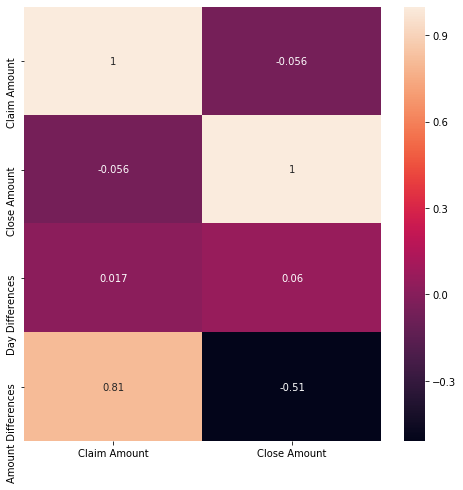

In [290]:
plt.figure(figsize = (8,8))
sns.heatmap(tsa.dropna().corr('spearman')[['Claim Amount','Close Amount']], annot = True)

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [32]:
np.random.seed(101)

In [275]:
np.random.seed(101)
tsa3 = tsa.copy()
tsa3.dropna(inplace=True)
tsa_baru =tsa3.sample(1000)

tsa_baru.to_csv('tsa_claims_dashboard_ujian.csv',index=False)

Export the data to your SQL database, and try to connect the database to the dashboard